In [95]:
import pandas as pd

In [96]:
data = pd.read_csv('breast_dataset.csv')
print(data.shape)
data.tail()
# 0 = no cancer
# 1 = cancer

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [97]:
x= data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [98]:
from sklearn.model_selection import train_test_split
x_tarin, x_test, y_tarin, y_test = train_test_split(x, y, test_size= 0.3, random_state = 10)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_tarin, y_tarin)

C:\Users\sanji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_predict = model.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_predict)

0.3567251461988304

In [101]:
y_test.shape

(171,)

In [102]:
confusion_matrix(y_test, y_predict)

array([[  2, 110],
       [  0,  59]], dtype=int64)

In [103]:
pd.crosstab(y_test, y_predict)

col_0,0,1
diagnosis,,
0,2,110
1,0,59


True Positive = 59,
True Negative = 2,
False Positive  = 110,
False Negative = 0

<b>Recall:</b>
The percentage of ture positive, are actualy pridected as true positive. OR Out of all the possible positive labels, how many did the model correctly identify?

Recall = True Positive / (True Positive + False Negative)

<b>Precision: </b>
Precision identifies the frequency with which a model was correct when predicting the positive class.

Precision = True Positive / (True Positive + True Neagtive)

In [111]:
from sklearn.metrics import precision_score, recall_score
print(f'Precision Score is: {precision_score(y_test, y_predict)}')
print(f'Recall Score is: {recall_score(y_test, y_predict)}')

Precision Score is: 0.34911242603550297
Recall Score is: 1.0


In [107]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
tpr,fpr,thresholds = roc_curve(y_test,y_predict)
f1_score = f1_score(y_test,y_predict)

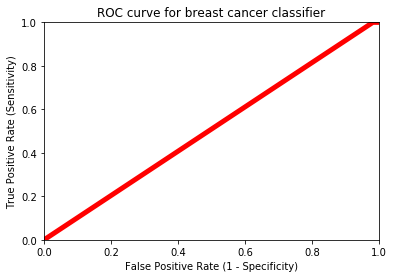

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, y_predict, drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [109]:
print(f'F1 Score: {f1_score}')

F1 Score: 0.5175438596491229


In [110]:
roc_auc_score(y_test, y_predict)

0.5089285714285714

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

1. True Positive Rate
2. False Positive Rate

<b>True Positive Rate (TPR)</b> is a synonym for recall and is therefore defined as follows:
TP / (TP+FN)

<b>False Positive Rate (FPR)</b> is defined as follows:
FN / (FN+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.


<b>AUC: Area Under the ROC Curve</b>
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


Sensitivity⬆️, Specificity⬇️ and Sensitivity⬇️, Specificity⬆️

TPR⬆️, FPR⬆️ and TPR⬇️, FPR⬇️

<b>F1 Score</b>
The F1 Score is the 2*((precision*recall)/(precision+recall)). It is also called the F Score or the F Measure. 
Put another way, the F1 score conveys the balance between the precision and the recall.

<b>OR</b>

F1 score is the harmonic mean of precision and recall